### Importing Libraries

In [3]:
import sys
print(sys.executable)

C:\Users\DELL\anaconda3\python.exe


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
from xml.dom import minidom
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

### Directory

In [9]:
data_dir = 'C:\\Users\\DELL\\Documents\\GitHub\\Face-Mask-Prediction\\face_mask'

In [10]:
os.listdir(data_dir)

['annotations']

In [11]:
os.listdir(data_dir+'\\annotations')[0]

'maksssksksss0.xml'

In [14]:
os.listdir(data_dir+'\\images')[0]

'maksssksksss0.png'

### Importing Images

In [15]:
#Defining function to extract 

image_tag = []
image_list = []

for file_name in os.listdir(data_dir+'\\annotations'):
    img_annot = data_dir+'\\annotations\\'+file_name
    image_layer = data_dir+'\\images\\'+file_name.split('.')[0]+'.png'
    
    img_path = minidom.parse(img_annot)
    name_ = img_path.getElementsByTagName('name')
    xmin_ = img_path.getElementsByTagName('xmin')
    ymin_ = img_path.getElementsByTagName('ymin')
    xmax_ = img_path.getElementsByTagName('xmax')
    ymax_ = img_path.getElementsByTagName('ymax')
    
    for n in range(len(name_)):
        y1=int(ymin_[n].childNodes[0].data)
        y2=int(ymax_[n].childNodes[0].data)
        x1=int(xmin_[n].childNodes[0].data)
        x2=int(xmax_[n].childNodes[0].data) 
        #Transforming and Appending the image into a list
        x = cv2.imread(image_layer)
        img = x[y1:y2,x1:x2]
        img = cv2.resize(img, (224, 224))
        img = img_to_array(img)
        #img = preprocess_input(img)
        image_list.append(img)
        #Appending the category of the image into a list
        image_tag.append(name_[n].childNodes[0].data)

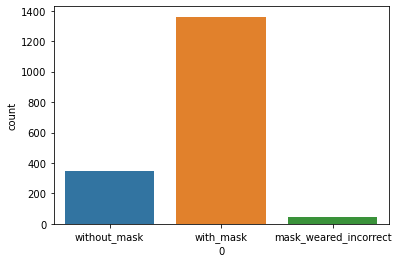

In [16]:
sns.countplot(pd.DataFrame(image_tag)[0])

In [17]:
#Encoding the target variable:
#without_mask = 0
#with_mask = 1 
#mask_weared_incoreect = 2

for i in range(len(image_tag)):
    if image_tag[i] == 'without_mask':
        image_tag[i] = 0
    elif image_tag[i] == 'with_mask':
        image_tag[i] = 1
    else:
        image_tag[i] = 2

In [18]:
#Converting the images into array as the NN algorithm taken the input in the form of array 
X = np.array(image_list, dtype="float32")

In [19]:
X

array([[[[122., 113., 126.],
         [122., 113., 126.],
         [122., 113., 126.],
         ...,
         [133., 133., 157.],
         [133., 133., 157.],
         [133., 133., 157.]],

        [[122., 113., 126.],
         [122., 113., 126.],
         [122., 113., 126.],
         ...,
         [133., 133., 157.],
         [133., 133., 157.],
         [133., 133., 157.]],

        [[122., 113., 126.],
         [122., 113., 126.],
         [122., 113., 126.],
         ...,
         [133., 133., 157.],
         [133., 133., 157.],
         [133., 133., 157.]],

        ...,

        [[ 34.,  31.,  47.],
         [ 34.,  31.,  47.],
         [ 34.,  31.,  47.],
         ...,
         [ 53.,  42.,  82.],
         [ 53.,  42.,  82.],
         [ 53.,  42.,  82.]],

        [[ 34.,  31.,  47.],
         [ 34.,  31.,  47.],
         [ 34.,  31.,  47.],
         ...,
         [ 53.,  42.,  82.],
         [ 53.,  42.,  82.],
         [ 53.,  42.,  82.]],

        [[ 34.,  31.,  47.],
       

In [20]:
type(X)

numpy.ndarray

In [21]:
# Total sample count
len(image_tag), X.max()

(1754, 255.0)

### Splitting into Train and Test dataset

In [22]:
# Creating the random integers to divide the dataset into train and test
# Out of ~4000 samples, 800 are taken as test set
import random
res = random.sample(range(1, len(image_tag)),800)
res2 = []
for i in range(len(image_tag)):
    if i in res:
        pass
    else:
        res2.append(i)

In [23]:
len(res2),len(res)

(954, 800)

In [24]:
#Converting the image_tag into array and reshaping the matrix
y = np.array(image_tag).reshape(len(image_tag),1)

In [25]:
#y = pd.get_dummies(pd.DataFrame(y)).values

In [26]:
X_train = X[res2]
X_test = X[res]

In [27]:
y_train = y[res2]
y_test = y[res]

In [28]:
X_train.shape

(954, 224, 224, 3)

In [29]:
#Normalization of X_train and X_test 
#Since the maximum value in the array is 255 and min value is 0, just dividing the array by 255 will normalize the vector
X_train = X_train/255
X_test = X_test/255

In [30]:
y_cat_test = to_categorical(y_test,num_classes=3)
y_cat_train = to_categorical(y_train,num_classes=3)

### Double check random images and tag

(<matplotlib.image.AxesImage at 0x1fde3cb5fc8>,
 array([1., 0., 0.], dtype=float32))

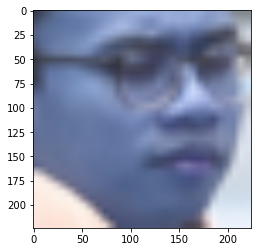

In [31]:
a = random.randint(0,len(X_train))
plt.imshow(X_train[a]),y_cat_train[a]

(<matplotlib.image.AxesImage at 0x1fe5b459f88>,
 array([0., 1., 0.], dtype=float32))

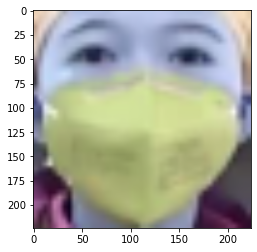

In [32]:
a = random.randint(0,len(X_train))
plt.imshow(X_train[a]),y_cat_train[a]

### Transforming Images

<Figure size 72x72 with 0 Axes>

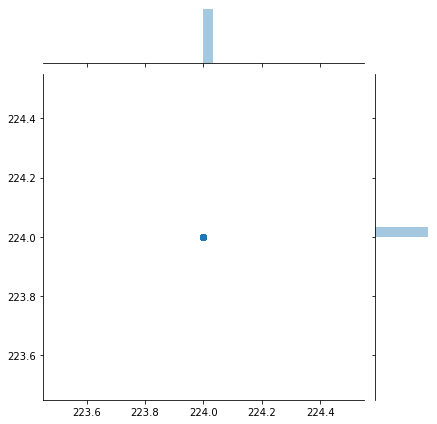

In [40]:
#Analyzing Images
dim1 = []
dim2 = []
for i in X_train:
    d1,d2,color = i.shape
    dim1.append(d1)
    dim2.append(d2)
plt.figure(figsize = (1,1))
sns.jointplot(dim1,dim2)

In [41]:
image_shape = (224,224,3)

In [42]:
image_gen = ImageDataGenerator(rotation_range = 10,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1, 
                               shear_range = 0.1, 
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                              )

In [43]:
for i in range(len(X_train)):
    X_train[i] = image_gen.random_transform(X_train[i])
    
for j in range(len(X_test)):
    X_test[j] = image_gen.random_transform(X_test[j])

### Model

In [60]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides=(1,1), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides=(2,1),input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 55, 109, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               23888128  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [62]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [63]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [64]:
model.fit(X_train,y_cat_train, epochs=50,batch_size = 64,  validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 97s 6s/step - loss: 0.7662 - accuracy: 0.6667 - val_loss: 0.6357 - val_accuracy: 0.7575
Epoch 2/50
15/15 [==============================] - 92s 6s/step - loss: 0.6013 - accuracy: 0.7831 - val_loss: 0.6232 - val_accuracy: 0.7575
Epoch 3/50
15/15 [==============================] - 89s 6s/step - loss: 0.6188 - accuracy: 0.7761 - val_loss: 0.6086 - val_accuracy: 0.7575
Epoch 4/50
15/15 [==============================] - 87s 6s/step - loss: 0.5709 - accuracy: 0.7970 - val_loss: 0.5809 - val_accuracy: 0.7575
Epoch 5/50
15/15 [==============================] - 101s 7s/step - loss: 0.5317 - accuracy: 0.7921 - val_loss: 0.5470 - val_accuracy: 0.7575
Epoch 6/50
15/15 [==============================] - 94s 6s/step - loss: 0.5221 - accuracy: 0.7874 - val_loss: 0.5190 - val_accuracy: 0.7525
Epoch 7/50
15/15 [==============================] - 88s 6s/step - loss: 0.4798 - accuracy: 0.7959 - val_loss: 0.5500 - val_accuracy: 0.7550


### Analyzing Results

In [65]:
loss = pd.DataFrame(model.history.history)

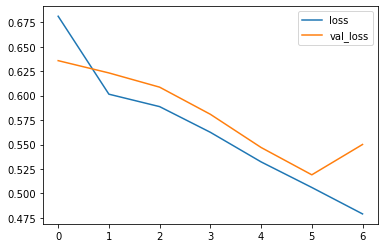

In [66]:
loss[['loss', 'val_loss']].plot()

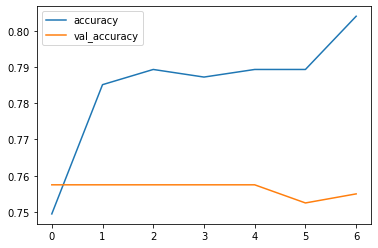

In [67]:
loss[['accuracy', 'val_accuracy']].plot()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
pred = model.predict_classes(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [70]:
report = classification_report(y_test, pred)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.76      1.00      0.86       606
           2       0.00      0.00      0.00        26

    accuracy                           0.76       800
   macro avg       0.25      0.33      0.29       800
weighted avg       0.57      0.76      0.65       800



In [72]:
clf_report = classification_report(y_test, pred,output_dict=True, target_names=['Without_Mask','WithMask','ImproperMask'])

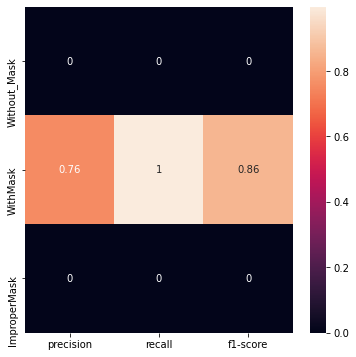

In [73]:
plt.figure(figsize = (6,6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True, )

### Testing Model on New Images

In [74]:
os.listdir(data_dir)

['annotations', 'images', 'unseen_img']

In [75]:
test_img = []

for file_name in os.listdir(data_dir+'\\unseen_img'):
    path = data_dir+'\\unseen_img\\'+file_name
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = img_to_array(img)
    test_img.append(img)

In [76]:
test_img = np.array(test_img, dtype="float32")
test_img = test_img/255

In [77]:
predictions = model.predict_classes(test_img)

(<matplotlib.image.AxesImage at 0x1fe5d5d7248>, 1)

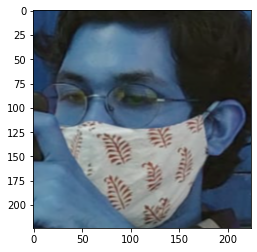

In [78]:
plt.imshow(test_img[0]),predictions[0]

(<matplotlib.image.AxesImage at 0x1fe5d62e4c8>, 1)

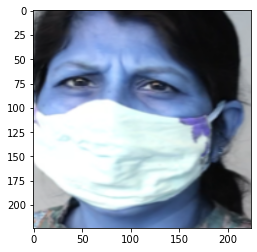

In [79]:
plt.imshow(test_img[1]),predictions[1]

(<matplotlib.image.AxesImage at 0x1fe5d69a388>, 1)

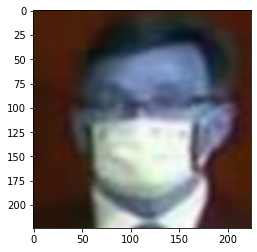

In [80]:
plt.imshow(test_img[3]),predictions[3]

(<matplotlib.image.AxesImage at 0x1fe5d70ae88>, 1)

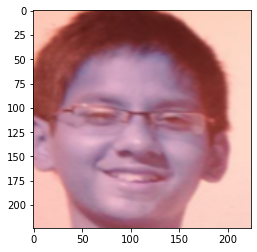

In [81]:
plt.imshow(test_img[4]),predictions[4]

(<matplotlib.image.AxesImage at 0x1fe5d77e948>, 1)

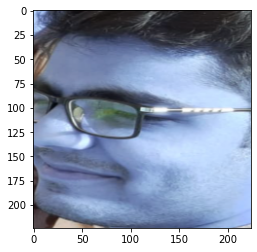

In [82]:
plt.imshow(test_img[5]),predictions[5]